### Q1. 

#### - Problem Description

##### Consider the following matrix
A = [
     
     1  2  3

     0  1  2
     
     5  6  7]

Perform the following operations.

>  a. Create the matrix A.

>  b. Find the determinant det of the matrix A rounded to nearest integer

>  c. Find the rank of the matrix A as rank

>  d. Find the inverse of the matrix A as inv

>  e. Find the upper triangular of the matrix A as utri.

In [264]:
#Q1a.Create the matrix A.
import numpy as np
A=np.matrix([[1, 2, 3], [0, 1, 2], [5, 6, 7]])
print('A=', A)



A= [[1 2 3]
 [0 1 2]
 [5 6 7]]


In [265]:
#Q1b. Find the determinant det of the matrix A rounded to nearest integer
det=np.linalg.det(A)
print('The determinant of matrix A=', det)


The determinant of matrix A= 0.0


In [266]:
#Q1c.Find the rank of the matrix A as rank
rank=np.linalg.matrix_rank(A)
print('The rank of matrix A=', rank)

The rank of matrix A= 2


In [267]:
#Q1d.Find the inverse of the matrix A as inv
we cannot find the inverse matrix of A, because the det value of matrix A=0

SyntaxError: invalid syntax (<ipython-input-267-98658381f3b6>, line 2)

In [268]:
#Q1e.Find the upper triangular of the matrix A as utri.
np.triu(A)



array([[1, 2, 3],
       [0, 1, 2],
       [0, 0, 7]])

### Q2. 

#### - Problem Description

##### A Company is interested in predicting the weekly orders for seasonal products it might get from the existing stores. It has historical data collected based on which the prediction has to be made. the data contains product name, store name, store location and orders placed in the past.

#### - Column Description
- product: Product Name
- store: Store Name
- division: Store Location Name
- orders_qty: Total orders recieved for the week
- date: Week end date (Sundays)
- product_type: Flag to represent whether the product is seasonal or not

As a data scientist and a ML expert, you are expected to help the company build the best model that would help them predict the orders that they'll get for future dates.

>  a. Write the code to load only seasonal products data into inpt_df data frame and create a column called product_key by combining product, store and division columns into one column with '^^^' as a separator.

>  b. Replace negative orders_qty (present in each product_key group) with median of historical postive records  and find the year wise 80th percentile for the product_key group.

>  c. Impute outliers detected by IQR using historical median of the product_key.

>  d. Create columns for quarter of the year, month of the year and week of month and make them as dummy (Categorical) variable

>  e. Divide the data into train and test. Consider 75% data (per product_key) for training and 25% for testing. 

>  f. Apply Linear Regression model using the categorical variables and find the best parameters for the product_key

>  g. Use the best parameters and predict for the test data.

>  h. Calculate MAPE per product_key for the predictions.

>  i. Store the results to a csv file --> forecast_file.csv

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
df=pd.read_csv('sample_data_assignment2.csv')
df

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,Unnamed: 6
0,P1 1L,S1,1/13/2019,486.400000,SEASONAL,EAST,NaN
1,P1 1L,S1,6/9/2019,768.000000,SEASONAL,EAST,NaN
2,P1 1L,S1,11/3/2019,256.000000,SEASONAL,EAST,NaN
3,P1 1L,S1,1/26/2020,396.800000,SEASONAL,EAST,NaN
4,P1 1L,S1,4/5/2020,242.128079,SEASONAL,EAST,NaN
...,...,...,...,...,...,...,...
1153,P1 1L,S1,11/4/2018,320.000000,SEASONAL,NORTH,NaN
1154,P1 500ML,S1,6/27/2021,25432.320000,SEASONAL,WEST,NaN
1155,P2 4L,S1,4/19/2020,0.000000,CONTINUOUS,WEST,NaN
1156,P2 4L,S1,6/21/2020,0.000000,CONTINUOUS,WEST,NaN


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCT       1158 non-null   object 
 1   STORE         1158 non-null   object 
 2   DATE          1158 non-null   object 
 3   ORDER_QTY     1158 non-null   float64
 4   PRODUCT_TYPE  1158 non-null   object 
 5   DIVISION      1158 non-null   object 
 6   Unnamed: 6    0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 63.5+ KB


In [272]:
df.drop(columns='Unnamed: 6', inplace=True)

In [273]:
df.isna().sum()

PRODUCT         0
STORE           0
DATE            0
ORDER_QTY       0
PRODUCT_TYPE    0
DIVISION        0
dtype: int64

In [274]:
#Q2a.a. Write the code to load only seasonal products data into inpt_df data frame and create a column called product_key by combining 
#product, store and division columns into one column with '^^^' as a separator.
int_df=df[df.PRODUCT_TYPE=='SEASONAL']
int_df

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION
0,P1 1L,S1,1/13/2019,486.400000,SEASONAL,EAST
1,P1 1L,S1,6/9/2019,768.000000,SEASONAL,EAST
2,P1 1L,S1,11/3/2019,256.000000,SEASONAL,EAST
3,P1 1L,S1,1/26/2020,396.800000,SEASONAL,EAST
4,P1 1L,S1,4/5/2020,242.128079,SEASONAL,EAST
...,...,...,...,...,...,...
1145,P1 500ML,S1,9/27/2020,345.600000,SEASONAL,SOUTH
1146,P1 500ML,S1,3/28/2021,264.960000,SEASONAL,SOUTH
1152,P1 1L,S1,7/19/2020,899.200000,SEASONAL,EAST
1153,P1 1L,S1,11/4/2018,320.000000,SEASONAL,NORTH


In [275]:
int_df['PRODUCT_KEY']=int_df['PRODUCT']+'^^^'+int_df['STORE']+'^^^'+int_df['DIVISION']+'^^^'
int_df

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,PRODUCT_KEY
0,P1 1L,S1,1/13/2019,486.400000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
1,P1 1L,S1,6/9/2019,768.000000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
2,P1 1L,S1,11/3/2019,256.000000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
3,P1 1L,S1,1/26/2020,396.800000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
4,P1 1L,S1,4/5/2020,242.128079,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
...,...,...,...,...,...,...,...
1145,P1 500ML,S1,9/27/2020,345.600000,SEASONAL,SOUTH,P1 500ML^^^S1^^^SOUTH^^^
1146,P1 500ML,S1,3/28/2021,264.960000,SEASONAL,SOUTH,P1 500ML^^^S1^^^SOUTH^^^
1152,P1 1L,S1,7/19/2020,899.200000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^
1153,P1 1L,S1,11/4/2018,320.000000,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^


In [276]:
#Q2b.Replace negative orders_qty (present in each product_key group) with median of historical postive records and 
#find the year wise 80th percentile for the product_key group.

(int_df['ORDER_QTY']<0).sum()# No negative Order_qty 
int_df['DATE']=pd.to_datetime(int_df['DATE'])
int_df['Year']=int_df['DATE'].dt.year



In [277]:
#find the year wise 80th percentile for the product_key group
int_df.groupby(['PRODUCT_KEY', 'Year']).ORDER_QTY.quantile(0.80)

PRODUCT_KEY               Year
P1 1L^^^S1^^^EAST^^^      2018      686.080000
                          2019     1779.200000
                          2020     1409.280000
                          2021     2201.600000
                          2022     1442.908731
P1 1L^^^S1^^^NORTH^^^     2018      300.800000
                          2019     3900.160000
                          2020     3769.600000
                          2021     4108.800000
                          2022      227.840000
P1 1L^^^S1^^^WEST^^^      2019     1433.600000
                          2020      593.920000
                          2021     1136.640000
                          2022        0.000000
P1 500ML^^^S1^^^SOUTH^^^  2018       96.256000
                          2019      556.800000
                          2020      491.520000
                          2021      486.656000
                          2022       84.992000
P1 500ML^^^S1^^^WEST^^^   2018      552.960000
                          201

In [318]:
int_df.groupby('PRODUCT_KEY')['ORDER_QTY'].quantile(0.25)

PRODUCT_KEY
P1 1L^^^S1^^^EAST^^^        524.80
P1 1L^^^S1^^^NORTH^^^       332.80
P1 1L^^^S1^^^WEST^^^          0.00
P1 500ML^^^S1^^^SOUTH^^^     69.12
P1 500ML^^^S1^^^WEST^^^     647.68
Name: ORDER_QTY, dtype: float64

In [279]:
#Q2c.Impute outliers detected by IQR using historical median of the product_key.
def median():
    for PRODUCT_KEY, int_df in g:
        q1=int_df['ORDER_QTY'].quantile(0.25)
        q3=int_df['ORDER_QTY'].quantile(0.75)
        IQR=q3-q1
        lower_outliers=q1-1.5*IQR
        upper_outliers=q3+1.5*IQR
        int_df['ORDER_QTY']=np.where(int_df['ORDER_QTY']<lower_outliers, int_df['ORDER_QTY'].median(), int_df['ORDER_QTY'])
        int_df['ORDER_QTY']=np.where(int_df['ORDER_QTY']>upper_outliers, int_df['ORDER_QTY'].median(), int_df['ORDER_QTY'])
        print(PRODUCT_KEY,  lower_outliers, upper_outliers)
median()

P1 1L^^^S1^^^EAST^^^ -1030.3999999999999 3116.7999999999997
P1 1L^^^S1^^^NORTH^^^ -4150.4 7804.799999999999
P1 1L^^^S1^^^WEST^^^ -1296.0 2160.0
P1 500ML^^^S1^^^SOUTH^^^ -531.84 1070.72
P1 500ML^^^S1^^^WEST^^^ -28472.96 49182.08


In [280]:
#Q2d.d. Create columns for quarter of the year, month of the year and week of month and 
#make them as dummy (Categorical) variable
int_df['Quarter']=int_df['DATE'].dt.quarter
int_df['week']=int_df['DATE'].dt.day//7+1
int_df['Month']=int_df['DATE'].dt.month

In [281]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PRODUCT       820 non-null    object        
 1   STORE         820 non-null    object        
 2   DATE          820 non-null    datetime64[ns]
 3   ORDER_QTY     820 non-null    float64       
 4   PRODUCT_TYPE  820 non-null    object        
 5   DIVISION      820 non-null    object        
 6   PRODUCT_KEY   820 non-null    object        
 7   Year          820 non-null    int64         
 8   Quarter       820 non-null    int64         
 9   week          820 non-null    int64         
 10  Month         820 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 76.9+ KB


In [282]:
dummy_df=pd.get_dummies(int_df)

In [283]:
dummy_df

,DATE,ORDER_QTY,Year,Quarter,week,Month,PRODUCT_P1 1L,PRODUCT_P1 500ML,STORE_S1,PRODUCT_TYPE_SEASONAL,DIVISION_EAST,DIVISION_NORTH,DIVISION_SOUTH,DIVISION_WEST,PRODUCT_KEY_P1 1L^^^S1^^^EAST^^^,PRODUCT_KEY_P1 1L^^^S1^^^NORTH^^^,PRODUCT_KEY_P1 1L^^^S1^^^WEST^^^,PRODUCT_KEY_P1 500ML^^^S1^^^SOUTH^^^,PRODUCT_KEY_P1 500ML^^^S1^^^WEST^^^
0,2019-01-13,486.400000,2019,1,2,1,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2019-06-09,768.000000,2019,2,2,6,1,0,1,1,1,0,0,0,1,0,0,0,0
2,2019-11-03,256.000000,2019,4,1,11,1,0,1,1,1,0,0,0,1,0,0,0,0
3,2020-01-26,396.800000,2020,1,4,1,1,0,1,1,1,0,0,0,1,0,0,0,0
4,2020-04-05,242.128079,2020,2,1,4,1,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2020-09-27,345.600000,2020,3,4,9,0,1,1,1,0,0,1,0,0,0,0,1,0
1146,2021-03-28,264.960000,2021,1,5,3,0,1,1,1,0,0,1,0,0,0,0,1,0
1152,2020-07-19,899.200000,2020,3,3,7,1,0,1,1,1,0,0,0,1,0,0,0,0
1153,2018-11-04,320.000000,2018,4,1,11,1,0,1,1,0,1,0,0,0,1,0,0,0


In [284]:
#Q2e. Divide the data into train and test. Consider 75% data (per product_key) for training and 25% for testing.
#Q2f.Apply Linear Regression model using the categorical variables and find the best parameters for the product_key
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def Buildmodel():
    for PRODUCT_KEY, int_df in g:
        x=int_df[['Quarter', 'Year', 'week', 'Month']]
        y=int_df['ORDER_QTY']
        x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)
        print(x_train.shape, y_train.shape)
        print(x_test.shape, y_test.shape)
        model=LinearRegression()
        model.fit(x_train, y_train)
        print(PRODUCT_KEY, model.score(x_test, y_test))
        print(PRODUCT_KEY, model.score(x_train, y_train))
    return
Buildmodel()
    




(126, 4) (126,)
(43, 4) (43,)
P1 1L^^^S1^^^EAST^^^ -0.07495091246115093
P1 1L^^^S1^^^EAST^^^ 0.0602108549774244
(126, 4) (126,)
(43, 4) (43,)
P1 1L^^^S1^^^NORTH^^^ -0.1947616481516894
P1 1L^^^S1^^^NORTH^^^ 0.036058934965897294
(108, 4) (108,)
(36, 4) (36,)
P1 1L^^^S1^^^WEST^^^ -0.0008383770049582573
P1 1L^^^S1^^^WEST^^^ 0.009573699411798864
(126, 4) (126,)
(43, 4) (43,)
P1 500ML^^^S1^^^SOUTH^^^ -0.42402759436317883
P1 500ML^^^S1^^^SOUTH^^^ 0.08631760579053538
(126, 4) (126,)
(43, 4) (43,)
P1 500ML^^^S1^^^WEST^^^ -0.08673643048099056
P1 500ML^^^S1^^^WEST^^^ 0.016174820193621486


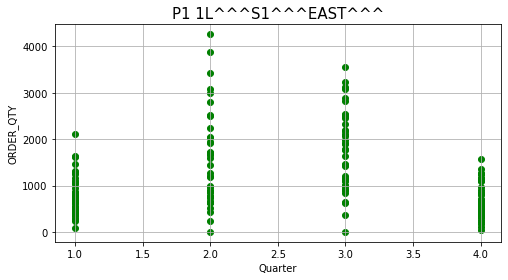

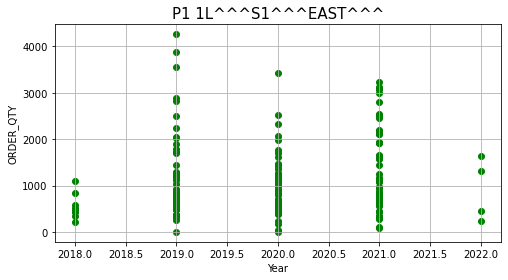

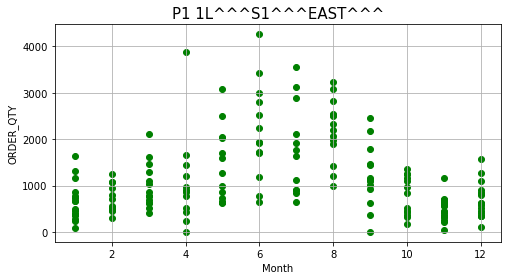

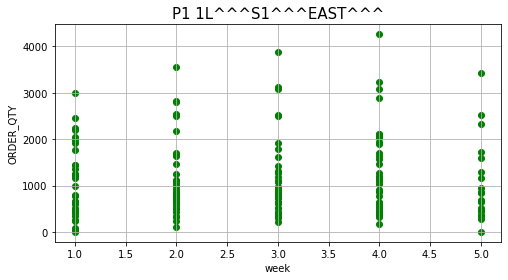

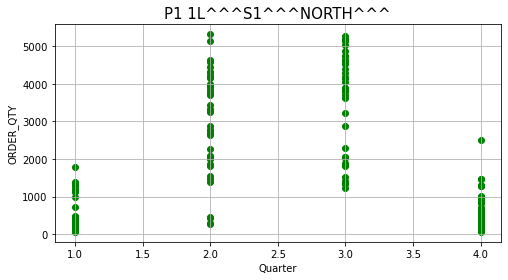

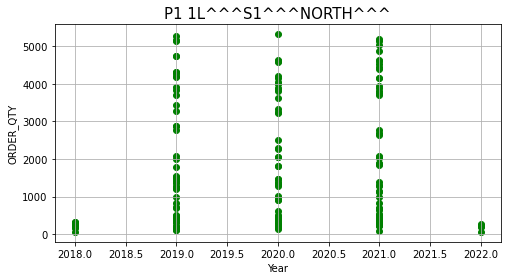

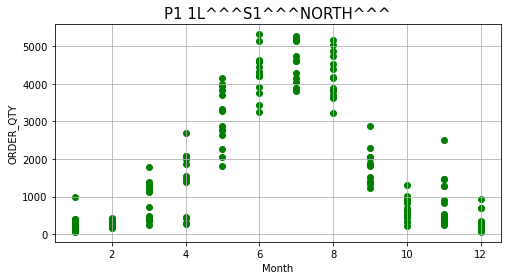

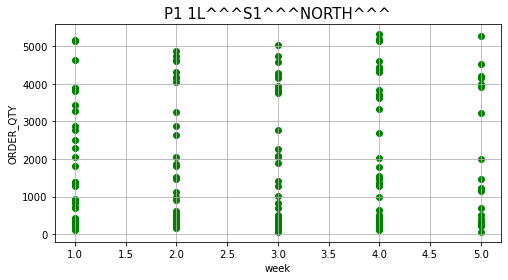

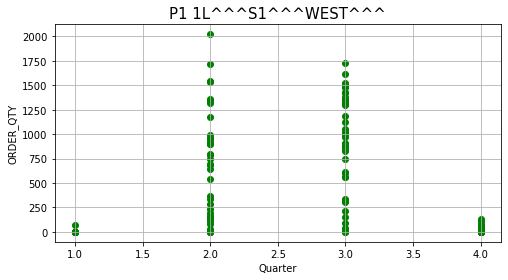

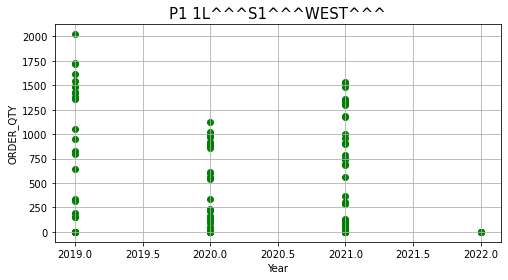

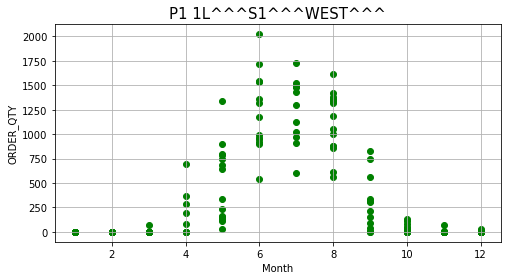

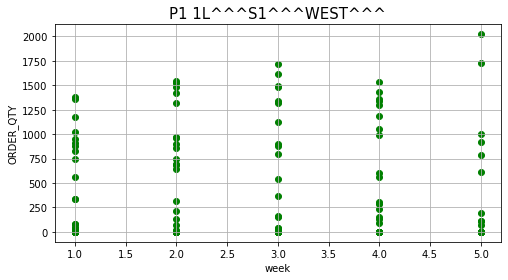

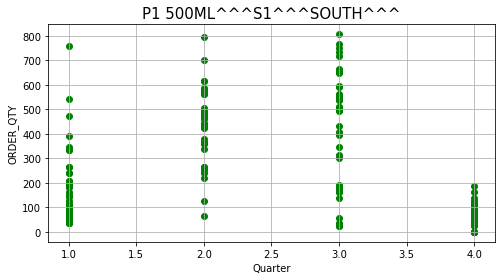

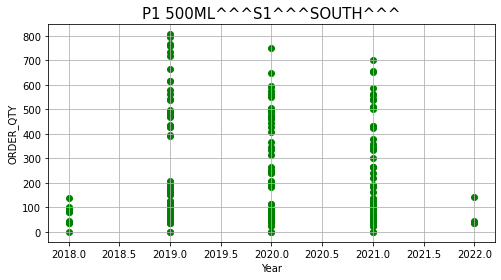

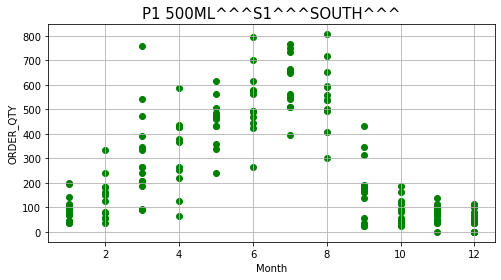

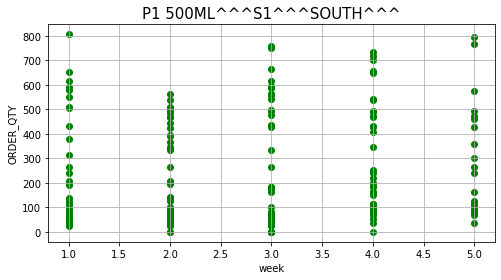

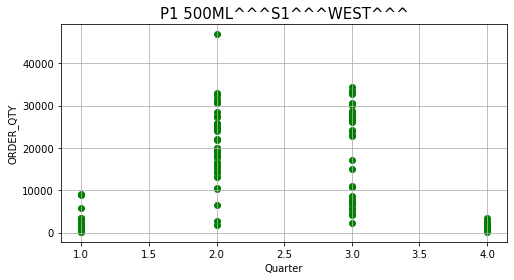

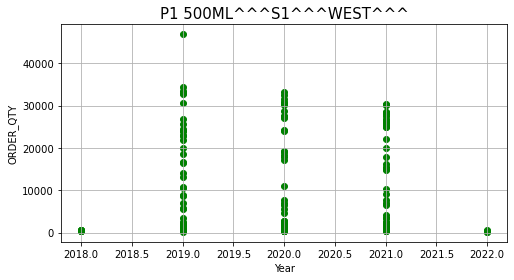

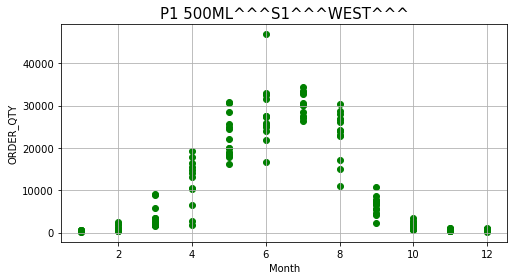

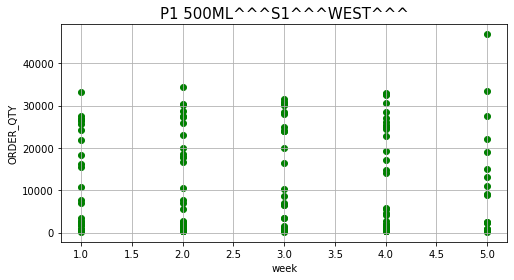

In [285]:
#Q2g.Use the best parameters and predict for the test data.
#Linear Regression
def linear_relation():
    for PRODUCT_KEY, int_df in g:
        Z=['Quarter', 'Year', 'Month', 'week']
        for col in Z:
            fig=plt.figure(figsize=(8,4))
            ax=fig.gca()
            features=int_df[col]
            label=int_df['ORDER_QTY']
            plt.scatter(x=features, y=label, color='g')
            plt.title(PRODUCT_KEY, fontsize=15)
            plt.xlabel(col)
            plt.ylabel('ORDER_QTY')
            plt.grid()
            plt.show()
    return
linear_relation()

In [286]:
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Vif():
    for PRODUCT_KEY, int_df in g:
        z=int_df[['ORDER_QTY', 'Year', 'Month', 'week']]
        var=pd.Series([variance_inflation_factor(z.values, idx)
                       for idx in range(z.shape[1])],
                      index=z.columns)
        print(PRODUCT_KEY, var)
    return
Vif()
# The colinearity is exist between the parameters. From above parameters Month the is best Parameter, Because the colinearity exist 
#slightly.

P1 1L^^^S1^^^EAST^^^ ORDER_QTY     2.824761
Year         11.033725
Month         4.410081
week          5.840596
dtype: float64
P1 1L^^^S1^^^NORTH^^^ ORDER_QTY     2.152100
Year         10.171475
Month         4.411441
week          5.838960
dtype: float64
P1 1L^^^S1^^^WEST^^^ ORDER_QTY     1.558439
Year         10.624714
Month         5.004428
week          5.816998
dtype: float64
P1 500ML^^^S1^^^SOUTH^^^ ORDER_QTY     2.544109
Year         11.185680
Month         4.590046
week          5.897712
dtype: float64
P1 500ML^^^S1^^^WEST^^^ ORDER_QTY     1.758514
Year         10.110123
Month         4.425509
week          5.843251
dtype: float64


In [287]:
# The best parameter prediction values
x11=int_df[['Month', 'Year', 'Month', 'week']]
y11=int_df['ORDER_QTY']
x_train, x_test, y_train, y_test=train_test_split(x11, y11, test_size=0.25, random_state=0)
model11=LinearRegression()
model11.fit(x_train, y_train)
pred=model11.predict(x_test)
print(pred)



[2633.11449886 3059.18250235 2888.50060722 3132.43007992 2644.57113451
 2524.70382775 2482.11158008 3031.7614674  2938.83491348 3202.44336254
 2629.39992179 2884.78603015 2571.32355694 2969.97052549 3202.44336254
 2633.11449886 2450.97596807 2973.99800702 3020.30483175 2935.12033641
 2722.01357125 3089.83783226 2722.32647572 2690.87795924 2873.01649003
 2443.23390947 2877.04397156 3039.503526   2540.18794493 3182.76438618
 3051.44044376 3082.09577366 2478.39700302 3159.85111487 3051.44044376
 2636.82907592 3124.68802133 2803.31611188 2714.58441713 2690.87795924
 2791.85947623 2644.57113451 2579.06561554 2582.7801926  3148.39447922
 2563.58149835 3148.39447922 2679.73422805 2818.96760671 2795.57405329
 2629.08701733 2977.71258408 2908.17958357 2656.50805228 2730.06853431
 2590.52225119 2935.12033641 2733.78311138 2857.84527731 2726.04105278
 3089.83783226 2915.92164217 2617.63038167 2923.66370076 3012.56277315
 2718.29899419 2822.99508824 2815.25302965 2892.52808875 2687.16338218
 2985.

In [288]:
#Q2h. Calculate MAPE per product_key for the predictions
from sklearn.metrics import mean_absolute_percentage_error
def MAPE():
    for PRODUCT_KEY, int_df in g:
        x=int_df[['Quarter', 'Year','Month', 'week']]
        y=int_df['ORDER_QTY']
        x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)
        model=LinearRegression()
        model.fit(x_train, y_train)
        pred=model.predict(x_test)
       # MAPE of each product key
        MAPE=mean_absolute_percentage_error(y_test, pred)
        print('MAPE value of' +PRODUCT_KEY, MAPE)
    return
MAPE()


MAPE value ofP1 1L^^^S1^^^EAST^^^ 0.8354916587531965
MAPE value ofP1 1L^^^S1^^^NORTH^^^ 1.9242168574709348
MAPE value ofP1 1L^^^S1^^^WEST^^^ 6.98157841858713e+17
MAPE value ofP1 500ML^^^S1^^^SOUTH^^^ 6.006540340678066e+16
MAPE value ofP1 500ML^^^S1^^^WEST^^^ 11.636438721775091


In [289]:
#Q2i.
result=pred
result
df=pd.DataFrame({'Predicted values': result})
df.to_csv('forecast_file.csv')
kk=pd.read_csv('forecast_file.csv')
kk

,Unnamed: 0,Predicted values
0,0,2633.114499
1,1,3059.182502
2,2,2888.500607
3,3,3132.430080
4,4,2644.571135
...,...,...
200,200,2857.845277
201,201,3124.688021
202,202,2656.508052
203,203,2923.663701


### Q3

#### Taking the forecasts made for the test period in Q1 
(for each product_key group)
> a. create a 'flag' column - marked True if the APEs (Absolute Percentage Error) for the weeks crosses 100

> b. create a 'trigger' column - set to True if there are 3 consecutive True in the 'flag' column

In [290]:
y_test.shape

(205,)

In [291]:
#Q3a.
values=np.abs((y_test-pred)/y_test)*100
APS_df=pd.DataFrame({'predicted_values':pred,
                'APS': values})
APS_df

,predicted_values,APS
865,2633.114499,428.822803
838,3059.182502,inf
666,2888.500607,85.587015
1005,3132.430080,1478.845806
132,2644.571135,86.132540
...,...,...
1085,2857.845277,45.007595
1108,3124.688021,inf
661,2656.508052,641.213184
490,2923.663701,3525.575026


In [292]:
APS_df['flag']=APS_df['APS']>100
APS_df.head(10)


,predicted_values,APS,flag
865,2633.114499,428.822803,True
838,3059.182502,inf,True
666,2888.500607,85.587015,False
1005,3132.430080,1478.845806,True
132,2644.571135,86.132540,False
14,2524.703828,inf,True
27,2482.111580,218.957939,True
607,3031.761467,78.285995,False
1061,2938.834913,82.115869,False
972,3202.443363,2427.180684,True


In [298]:
#Q3b.Create a 'trigger' column - set to True if there are 3 consecutive True in the 'flag' column
values=APS_df['flag'].rolling(3, center=True).sum()
values.head(30)
APS_df['Trigger']=(values==3)
APS_df.head(30)

,predicted_values,APS,flag,Trigger
865,2633.114499,428.822803,True,False
838,3059.182502,inf,True,False
666,2888.500607,85.587015,False,False
1005,3132.430080,1478.845806,True,False
132,2644.571135,86.132540,False,False
14,2524.703828,inf,True,False
27,2482.111580,218.957939,True,False
607,3031.761467,78.285995,False,False
1061,2938.834913,82.115869,False,False
972,3202.443363,2427.180684,True,False


### Q4

#### Suggest an alternative method to identify outliers and/or impute outliers in Q1 c.

In [299]:
#Q4
int_df['Z_SCORE'] = ( int_df.ORDER_QTY - int_df.ORDER_QTY.mean() ) / int_df.ORDER_QTY.std()
int_df.head()

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,PRODUCT_KEY,Year,Quarter,week,Month,Z_SCORE
0,P1 1L,S1,2019-01-13,486.400000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2019,1,2,1,-0.353919
1,P1 1L,S1,2019-06-09,768.000000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2019,2,2,6,-0.311148
2,P1 1L,S1,2019-11-03,256.000000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2019,4,1,11,-0.388913
3,P1 1L,S1,2020-01-26,396.800000,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2020,1,4,1,-0.367527
4,P1 1L,S1,2020-04-05,242.128079,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2020,2,1,4,-0.391020


In [300]:
int_df[int_df['Z_SCORE']>3]

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,PRODUCT_KEY,Year,Quarter,week,Month,Z_SCORE
25,P1 500ML,S1,2019-06-30,46844.16,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,2,5,6,6.687120
81,P1 500ML,S1,2019-06-16,23937.28,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,2,3,6,3.207914
82,P1 500ML,S1,2019-07-07,34291.20,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,3,2,7,4.780517
148,P1 500ML,S1,2019-07-14,30493.44,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,3,3,7,4.203695
149,P1 500ML,S1,2019-07-28,33338.88,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,3,5,7,4.635874
159,P1 500ML,S1,2021-08-01,26905.60,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2021,3,1,8,3.658756
224,P1 500ML,S1,2019-08-04,26735.36,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,3,1,8,3.632899
227,P1 500ML,S1,2021-07-04,26410.24,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2021,3,1,7,3.583519
291,P1 500ML,S1,2019-08-18,23900.16,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,3,3,8,3.202276
293,P1 500ML,S1,2021-07-18,30071.04,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2021,3,3,7,4.139538


In [301]:
int_df[int_df['Z_SCORE']<-3]

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,PRODUCT_KEY,Year,Quarter,week,Month,Z_SCORE


In [302]:
intdf_new = int_df[(int_df.Z_SCORE>-3) & (int_df.Z_SCORE<3)]

In [303]:
intdf_new.tail(10)

,PRODUCT,STORE,DATE,ORDER_QTY,PRODUCT_TYPE,DIVISION,PRODUCT_KEY,Year,Quarter,week,Month,Z_SCORE
1139,P1 1L,S1,2020-01-05,390.40,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^,2020,1,1,1,-0.368500
1140,P1 1L,S1,2021-08-01,3820.80,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^,2021,3,1,8,0.152526
1141,P1 1L,S1,2021-11-14,838.40,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^,2021,4,3,11,-0.300455
1142,P1 1L,S1,2021-12-12,268.80,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^,2021,4,2,12,-0.386969
1143,P1 500ML,S1,2019-04-07,10522.88,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2019,2,2,4,1.170470
1144,P1 500ML,S1,2020-09-13,5493.76,SEASONAL,WEST,P1 500ML^^^S1^^^WEST^^^,2020,3,2,9,0.406623
1145,P1 500ML,S1,2020-09-27,345.60,SEASONAL,SOUTH,P1 500ML^^^S1^^^SOUTH^^^,2020,3,4,9,-0.375304
1146,P1 500ML,S1,2021-03-28,264.96,SEASONAL,SOUTH,P1 500ML^^^S1^^^SOUTH^^^,2021,1,5,3,-0.387552
1152,P1 1L,S1,2020-07-19,899.20,SEASONAL,EAST,P1 1L^^^S1^^^EAST^^^,2020,3,3,7,-0.291221
1153,P1 1L,S1,2018-11-04,320.00,SEASONAL,NORTH,P1 1L^^^S1^^^NORTH^^^,2018,4,1,11,-0.379192
